In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve,auc



In [ ]:
x,y=make_classification(n_samples=1000,n_features=20,n_classes=2,random_state=42)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
from scipy.sparse import random_array
logistic_model=LogisticRegression(random_state=42)
logistic_model.fit(x_train,y_train)

random_forest_model=RandomForestClassifier(random_state=42)
random_forest_model.fit(x_train,y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred_logistic=logistic_model.predict_proba(x_test)[:,1]
y_pred_random_forest=random_forest_model.predict_proba(x_test)[:,1]

In [ ]:
test_df=pd.DataFrame({'logistic':y_pred_logistic,'random_forest':y_pred_random_forest})

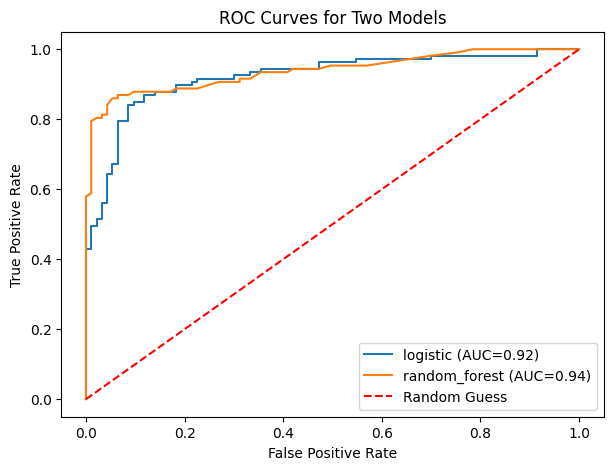

In [ ]:
plt.figure(figsize=(7, 5))
for model in ['logistic', 'random_forest']:
    fpr, tpr, _=roc_curve(y_test, test_df[model])
    roc_auc=auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{model} (AUC={roc_auc:.2f})')

plt.plot([0,1], [0, 1], 'r--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Two Models')
plt.legend()
plt.show()